**1. Importing Libraries and Loading Data**
In this section, we import the necessary libraries and load the MNIST dataset. TensorFlow and Keras are used for building and training the neural network, while other libraries like NumPy and Matplotlib are used for data manipulation and visualization.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
import numpy as np
from sklearn.model_selection import train_test_split
from time import time
import matplotlib.pyplot as plt
import random

**2. Data Preparation**
Here, we load the MNIST dataset and split it into training, validation, and test sets. The images are also normalized to the [0, 1] range to facilitate faster and more stable training.

In [ ]:
# Load the MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

# Split the data into training and cross-validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Print the shapes of the datasets
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (48000, 28, 28), y_train shape: (48000,)
x_val shape: (12000, 28, 28), y_val shape: (12000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)


In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_val = x_val.astype('float32') / 255

**3. Building the Model**
In this section, we define the neural network architecture using Keras' Sequential API. The model consists of three dense layers with dropout and batch normalization for regularization.

In [ ]:
tf.random.set_seed(1234)

# Define the model
model = Sequential([
    tf.keras.Input(shape=(28, 28)),
    Flatten(),
    Dense(64, activation='relu', name="L1"),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu', name="L2"),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='linear', name="L3")
], name="my_model_3")

**4. Compiling the Model**
The model is compiled with a loss function, an optimizer, and evaluation metrics. Sparse Categorical Crossentropy is used as the loss function, Adam as the optimizer, and accuracy as the evaluation metric.

In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

**5. Defining Callbacks**
Callbacks are defined to prevent overfitting and improve model performance. Early stopping halts training when validation loss stops improving, and learning rate reduction decreases the learning rate when a plateau in validation loss is detected.

**6. Training the Model**
The model is trained using the training data, with validation data used to monitor its performance. The defined callbacks are used to enhance the training process.

In [ ]:
# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
1500/1500 [==============================] - 9s 5ms/step - loss: 0.4979 - accuracy: 0.8547 - val_loss: 0.2007 - val_accuracy: 0.9397 - lr: 0.0010
Epoch 2/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2701 - accuracy: 0.9185 - val_loss: 0.1554 - val_accuracy: 0.9521 - lr: 0.0010
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2266 - accuracy: 0.9328 - val_loss: 0.1262 - val_accuracy: 0.9613 - lr: 0.0010
Epoch 4/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2005 - accuracy: 0.9395 - val_loss: 0.1178 - val_accuracy: 0.9622 - lr: 0.0010
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1826 - accuracy: 0.9461 - val_loss: 0.1150 - val_accuracy: 0.9643 - lr: 0.0010
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1726 - accuracy: 0.9486 - val_loss: 0.1006 - val_accuracy: 0.9697 - lr: 0.0010
Epoch 7/50
1500/1500 [==============================] - 6s

**7. Visualizing Training History**
The training and validation loss over epochs are plotted to visualize the model's learning process and detect potential overfitting.



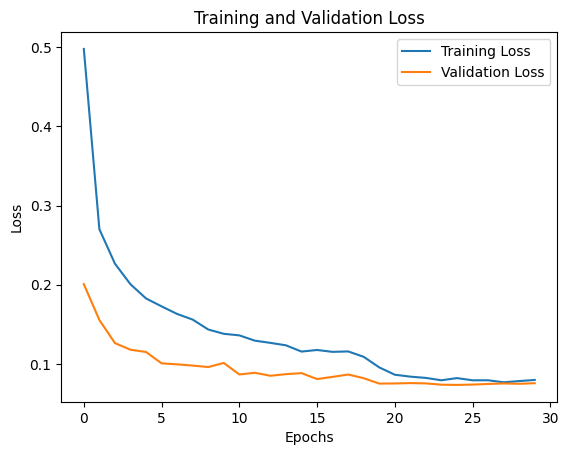

In [ ]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**8. Evaluating the Model**
The model is evaluated on the test data to determine its performance in terms of loss and accuracy.

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9785
Test Loss: 0.07283170521259308
Test Accuracy: 0.9785000085830688


**9. Making Predictions and Visualizing Results**
We make predictions on a set of test samples, display the true and predicted labels, and count the number of misclassifications. This helps in understanding the model's performance on individual samples.



1/1 [==============================] - 0s 27ms/step
Sample 8406: True Label: 4, Predicted Label: 4
1/1 [==============================] - 0s 42ms/step
Sample 4497: True Label: 8, Predicted Label: 8
1/1 [==============================] - 0s 28ms/step
Sample 6529: True Label: 4, Predicted Label: 4
1/1 [==============================] - 0s 26ms/step
Sample 9667: True Label: 8, Predicted Label: 8
1/1 [==============================] - 0s 32ms/step
Sample 7084: True Label: 0, Predicted Label: 0


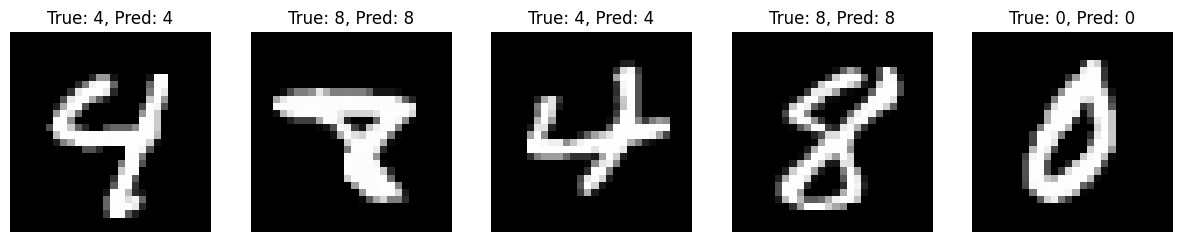

1/1 [==============================] - 0s 25ms/step
Sample 4796: True Label: 3, Predicted Label: 3
1/1 [==============================] - 0s 25ms/step
Sample 8879: True Label: 4, Predicted Label: 4
1/1 [==============================] - 0s 43ms/step
Sample 8589: True Label: 4, Predicted Label: 4
1/1 [==============================] - 0s 27ms/step
Sample 3139: True Label: 8, Predicted Label: 8
1/1 [==============================] - 0s 23ms/step
Sample 9261: True Label: 3, Predicted Label: 3


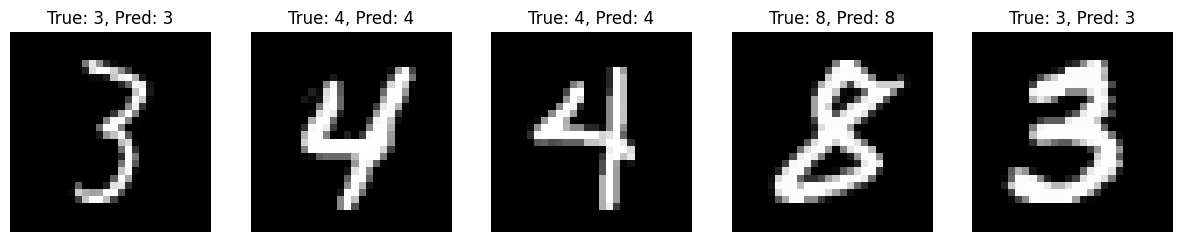

1/1 [==============================] - 0s 24ms/step
Sample 3888: True Label: 9, Predicted Label: 9
1/1 [==============================] - 0s 22ms/step
Sample 1933: True Label: 7, Predicted Label: 7
1/1 [==============================] - 0s 21ms/step
Sample 3312: True Label: 5, Predicted Label: 5
1/1 [==============================] - 0s 32ms/step
Sample 5961: True Label: 9, Predicted Label: 9
1/1 [==============================] - 0s 27ms/step
Sample 7891: True Label: 6, Predicted Label: 6


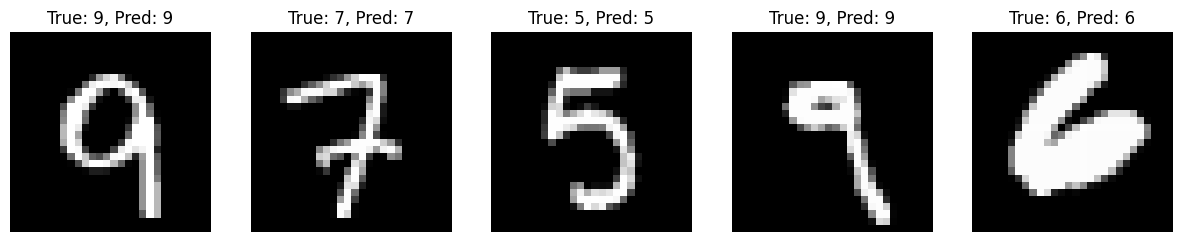

1/1 [==============================] - 0s 21ms/step
Sample 2094: True Label: 4, Predicted Label: 4
1/1 [==============================] - 0s 23ms/step
Sample 9648: True Label: 0, Predicted Label: 0
1/1 [==============================] - 0s 29ms/step
Sample 5999: True Label: 7, Predicted Label: 7
1/1 [==============================] - 0s 23ms/step
Sample 7407: True Label: 3, Predicted Label: 3
1/1 [==============================] - 0s 29ms/step
Sample 6301: True Label: 6, Predicted Label: 6


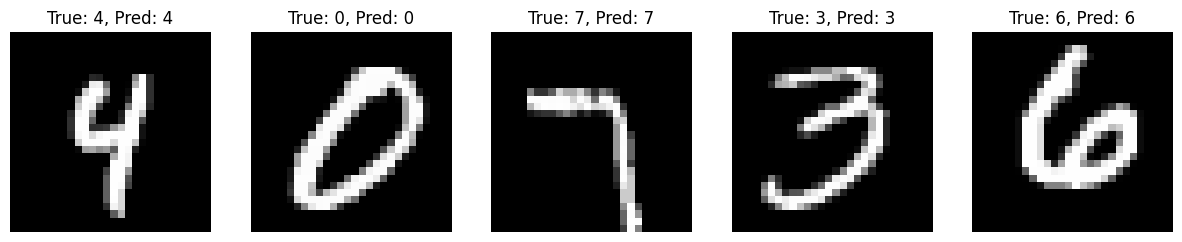

1/1 [==============================] - 0s 23ms/step
Sample 8867: True Label: 3, Predicted Label: 3
1/1 [==============================] - 0s 21ms/step
Sample 2486: True Label: 6, Predicted Label: 6
1/1 [==============================] - 0s 21ms/step
Sample 2728: True Label: 6, Predicted Label: 6
1/1 [==============================] - 0s 24ms/step
Sample 3283: True Label: 3, Predicted Label: 3
1/1 [==============================] - 0s 21ms/step
Sample 4798: True Label: 6, Predicted Label: 6


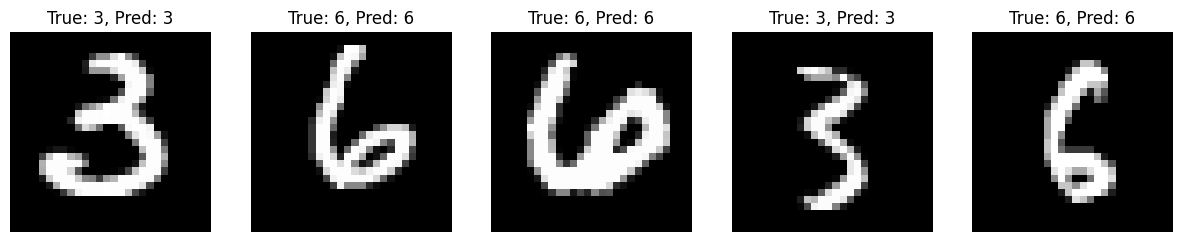

1/1 [==============================] - 0s 22ms/step
Sample 2441: True Label: 3, Predicted Label: 3
1/1 [==============================] - 0s 21ms/step
Sample 7951: True Label: 8, Predicted Label: 8
1/1 [==============================] - 0s 23ms/step
Sample 8823: True Label: 5, Predicted Label: 5
1/1 [==============================] - 0s 24ms/step
Sample 7900: True Label: 1, Predicted Label: 1
1/1 [==============================] - 0s 23ms/step
Sample 2919: True Label: 5, Predicted Label: 5


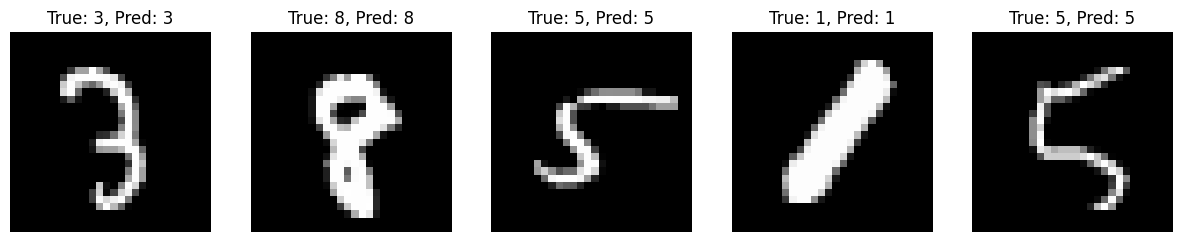

1/1 [==============================] - 0s 21ms/step
Sample 7271: True Label: 2, Predicted Label: 2
1/1 [==============================] - 0s 27ms/step
Sample 5421: True Label: 6, Predicted Label: 6
1/1 [==============================] - 0s 25ms/step
Sample 6790: True Label: 3, Predicted Label: 3
1/1 [==============================] - 0s 25ms/step
Sample 3043: True Label: 0, Predicted Label: 0
1/1 [==============================] - 0s 29ms/step
Sample 9008: True Label: 4, Predicted Label: 4


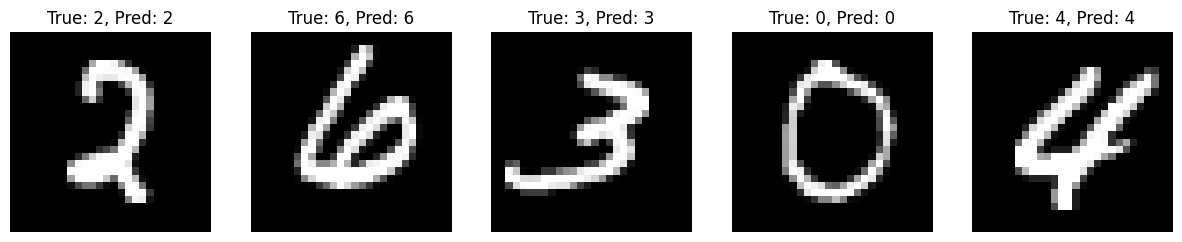

1/1 [==============================] - 0s 23ms/step
Sample 8351: True Label: 0, Predicted Label: 0
1/1 [==============================] - 0s 22ms/step
Sample 8798: True Label: 0, Predicted Label: 0
1/1 [==============================] - 0s 26ms/step
Sample 8236: True Label: 8, Predicted Label: 8
1/1 [==============================] - 0s 24ms/step
Sample 1898: True Label: 0, Predicted Label: 0
1/1 [==============================] - 0s 25ms/step
Sample 7791: True Label: 0, Predicted Label: 0


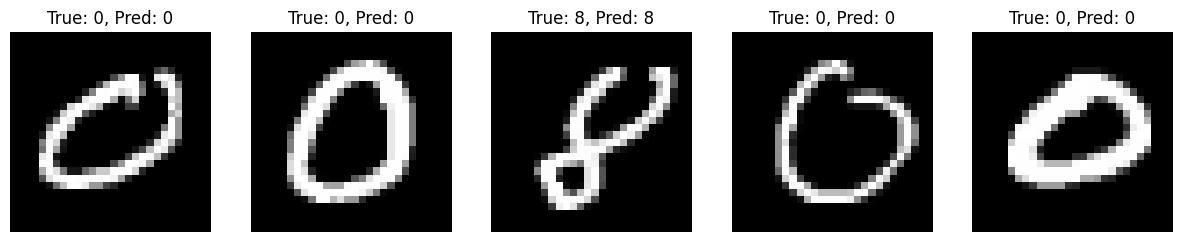

n is equal to 0


In [ ]:
n = 0
samples_per_row = 5
num_samples = 40

for i in range(0, num_samples, samples_per_row):
    fig, axes = plt.subplots(1, samples_per_row, figsize=(15, 3))
    for j in range(samples_per_row):
        if i + j >= num_samples:
            break

        random_index = random.randint(0, len(x_test) - 1)
        sample_image = x_test[random_index]
        sample_label_true = y_test[random_index]

        # Reshape the sample_image if necessary (Flatten layer expects a batch of inputs)
        if len(sample_image.shape) == 2:
            sample_image = np.expand_dims(sample_image, axis=0)

        # Predict the label for the sample
        predictions = model.predict(sample_image)
        predicted_label = np.argmax(predictions)

        if predicted_label != sample_label_true:
            n = n + 1

        # Print the predicted and true labels
        print(f"Sample {random_index}: True Label: {sample_label_true}, Predicted Label: {predicted_label}")

        # Plot the sample image
        ax = axes[j]
        ax.imshow(sample_image.squeeze(), cmap='gray')
        ax.set_title(f"True: {sample_label_true}, Pred: {predicted_label}")
        ax.axis('off')

    plt.show()

print("n is equal to", n)